# Single ended input to differential output with level shifting
Formulas from https://www.analog.com/en/design-notes/single-ended-to-differential-amplifier-design-tips.html, Figure 2.

Requires Vref that's the common mode voltage of the input.
Amplifies signal with gain GN and shifts the output common mode voltage to Vocm

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

In [2]:
GN = 5
R1val = 1e3
Rsval = 50

In [3]:
Rf, R1, R2, Rs, Rt = smp.symbols("RF R1 R2 Rs Rt")
Vopp, Vipp, Vincm, Vocm = smp.symbols("Vopp Vipp Vicm Vocm")

In [4]:
Rf = (smp.sqrt((GN**2 * (4*R1**2 + Rs**2) + 2*GN*R1*(2*R1-Rs)+R1**2)) + GN*(2*R1+Rs)-R1) / 2
Rf

9*R1/2 + 5*Rs/2 + sqrt(101*R1**2 + 10*R1*(2*R1 - Rs) + 25*Rs**2)/2

In [5]:
Rt = Rs*(R1+Rf) / (R1 + Rf - Rs*(GN+1))
Rt

Rs*(11*R1/2 + 5*Rs/2 + sqrt(101*R1**2 + 10*R1*(2*R1 - Rs) + 25*Rs**2)/2)/(11*R1/2 - 7*Rs/2 + sqrt(101*R1**2 + 10*R1*(2*R1 - Rs) + 25*Rs**2)/2)

In [6]:
R2 = Rs*Rf / (Rs + Rt)

In [7]:
print(f"Rf = {float(Rf.subs(R1, R1val).subs(Rs, Rsval)):.1f} Ω")

Rf = 10115.0 Ω


In [8]:
print(f"Rt = {float(Rt.subs(R1, R1val).subs(Rs, Rsval)):.1f} Ω")

Rt = 51.4 Ω


In [9]:
print(f"R2 = {float(R2.subs(R1, R1val).subs(Rs, Rsval)):.1f} Ω")

R2 = 4988.3 Ω


In [10]:
_R1val = 1e3
_Rs = np.logspace(np.log10(50),5,201)

_Rf = [Rf.subs(R1,_R1val).subs(Rs,v) for v in _Rs]
_Rt = [Rt.subs(R1,_R1val).subs(Rs,v) for v in _Rs]
_R2 = [R2.subs(R1,_R1val).subs(Rs,v) for v in _Rs]

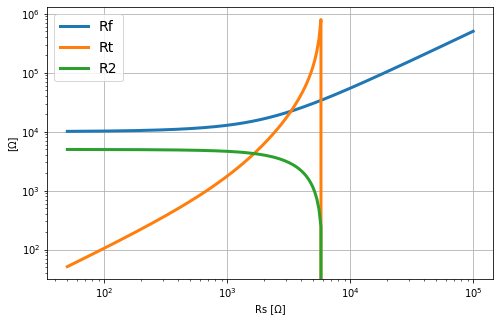

In [11]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_Rs, _Rf, lw = 3, label = 'Rf')
ax.plot(_Rs, _Rt, lw = 3, label = 'Rt')
ax.plot(_Rs, _R2, lw = 3, label = 'R2')
ax.set_xlabel("Rs [Ω]")
ax.set_ylabel("[Ω]")
ax.legend(fontsize = 14);
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')